In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of rows
n = 10000

# Independent variables (features)
age = np.random.randint(18, 65, n)
experience = age - 18 + np.random.randint(-2, 5, n)  # correlated with age
education_level = np.random.choice([10, 12, 14, 16, 18], n)  # in years
hours_per_week = np.random.normal(40, 5, n).clip(20, 60)
city_index = np.random.choice([1,2,3,4,5], n)  # categorical encoded

# Noise
noise = np.random.normal(0, 5000, n)

# Linear relationship (salary)
salary = (
    age * 300
    + experience * 500
    + education_level * 1000
    + hours_per_week * 200
    + city_index * 1500
    + 30000  # base salary
    + noise
)

# DataFrame
df = pd.DataFrame({
    "Age": age,
    "Experience": experience,
    "EducationLevel": education_level,
    "HoursPerWeek": hours_per_week.round(1),
    "CityIndex": city_index,
    "Salary": salary.round(2)
})

df.head(), df.shape


(   Age  Experience  EducationLevel  HoursPerWeek  CityIndex    Salary
 0   56          42              12          33.6          5  99207.03
 1   46          30              14          48.3          2  91699.04
 2   32          15              18          38.2          2  72272.02
 3   60          41              10          36.6          5  96250.04
 4   25          10              18          39.8          3  59784.05,
 (10000, 6))

In [2]:
df.corr()["Salary"].sort_values(ascending=False)


Salary            1.000000
Experience        0.868945
Age               0.867007
EducationLevel    0.235794
CityIndex         0.173378
HoursPerWeek      0.100356
Name: Salary, dtype: float64

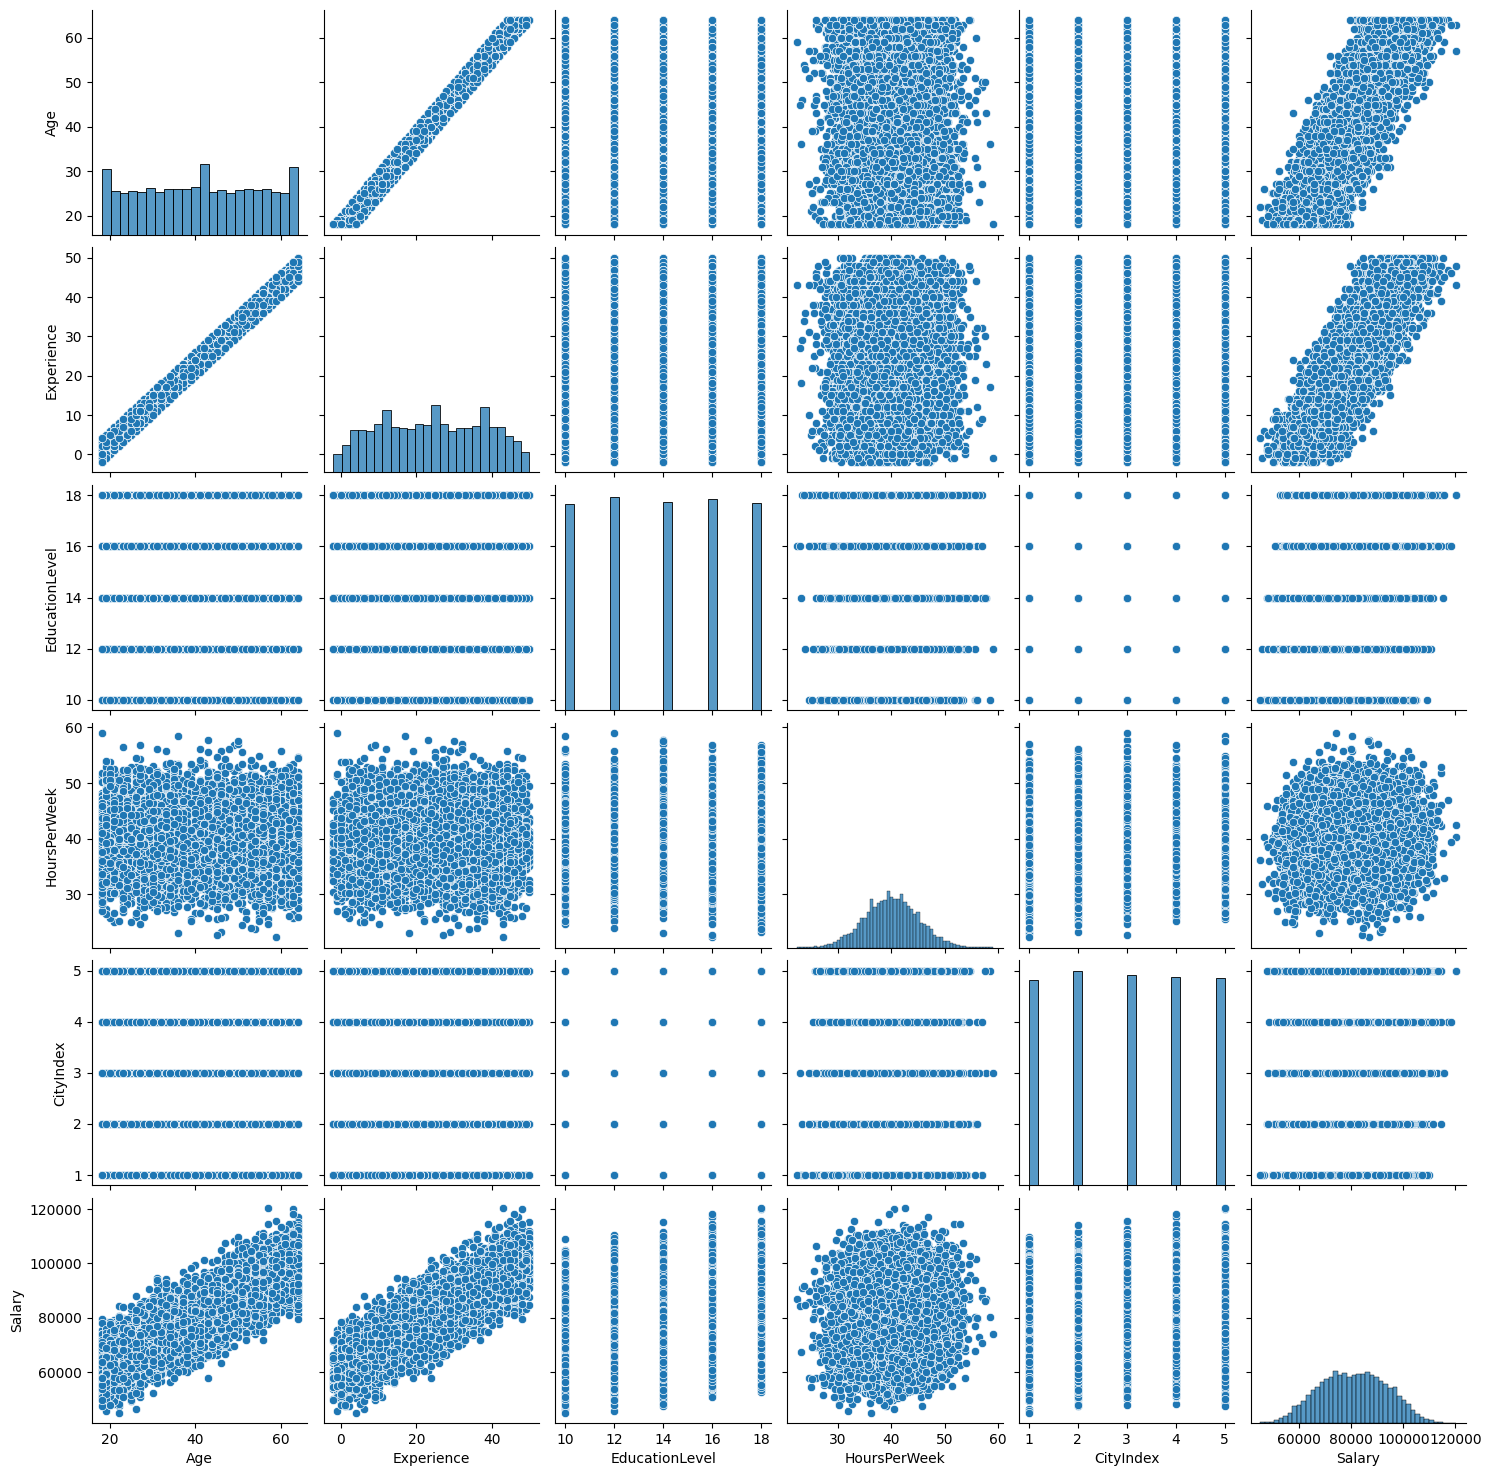

In [3]:
sns.pairplot(df[["Age", "Experience", "EducationLevel", "HoursPerWeek", "CityIndex", "Salary"]])
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Features and target
X = df[["Age", "Experience", "EducationLevel"]]
y = df["Salary"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


In [6]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.8075157178677306


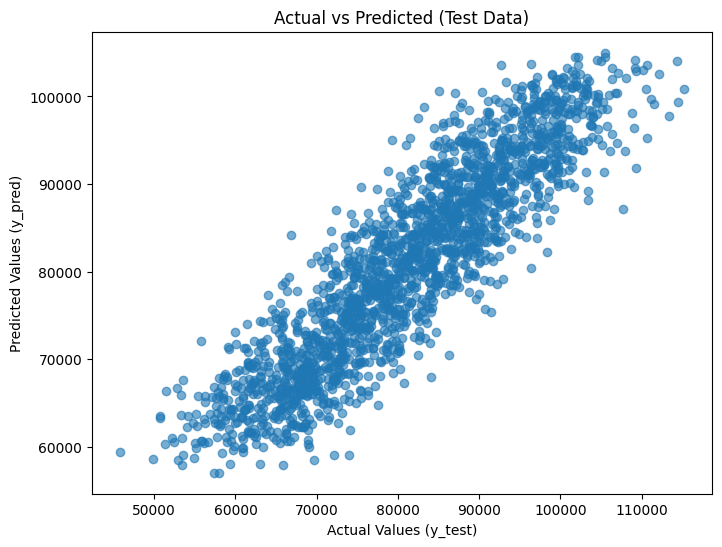

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted (Test Data)")

plt.show()


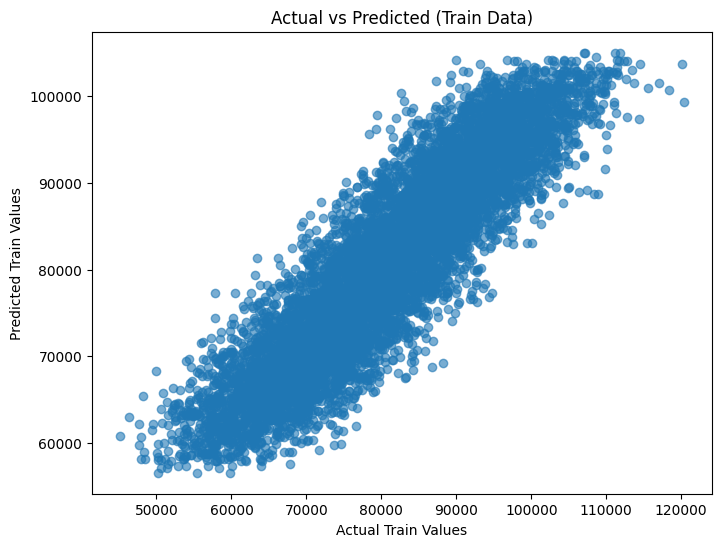

In [8]:
y_train_pred = model.predict(X_train)

plt.figure(figsize=(8,6))

plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.xlabel("Actual Train Values")
plt.ylabel("Predicted Train Values")
plt.title("Actual vs Predicted (Train Data)")

plt.show()


In [9]:
import joblib

# Save model
joblib.dump(model, "linear_regression_model.pkl")


['linear_regression_model.pkl']